# ADVANCED CLASSIFICATION MODEL EVALUATION

## AGENDA

- Null accuracy, handling missing values
- Confusion matrix, sensitivity, specificity, setting a threshold
- Handling categorical features, interpreting logistic regression coefficients
- Receiving Operating Characteristic (ROC) curves, Area Under Curve (AUC)

## PART 1: NULL ACCURACY, HANDLING MISSING VALUES

### TITANIC CASE STUDY OVERVIEW

- https://www.kaggle.com/c/titanic/data
- http://trevorstephens.com/post/72916401642/titanic-getting-started-with-r

#### READ THE DATA FROM TITANIC.CSV INTO A DATAFRAME

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
titanic = pd.read_csv('../data/titanic.csv', index_col='PassengerId')

In [3]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 11)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
549 / 891

0.6161616161616161

In [6]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### DEFINE Pclass/Parch AS THE FEATURES AND SURVIVED AS THE RESPONSE

In [7]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

#### SPLIT THE DATA INTO TRAINING AND TESTING SETS

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
print (titanic.shape)
print (X_train.shape)
print (X_test.shape)

(891, 11)
(668, 2)
(223, 2)


#### FIT A LOGISTIC REGRESSION MODEL

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### MAKE PREDICTION ON TESTING SET AND CALCULATE ACCURACY

In [11]:
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.6681614349775785


### WHAT IS NULL ACCURACY? 

**Null accuracy** is the accuracy that could be achieved by always predicting the **most frequent class**. It is a baseline against which you may want to measure your classifier.

In [13]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
y_test.shape

(223,)

In [15]:
import numpy as np
np.where(y_test == 1)

(array([  0,   2,   4,   7,   9,  11,  13,  14,  15,  19,  22,  25,  26,
         27,  29,  31,  35,  36,  38,  40,  41,  42,  44,  48,  51,  54,
         55,  63,  64,  65,  66,  67,  76,  79,  80,  84,  89,  93,  97,
        102, 104, 110, 113, 118, 119, 120, 124, 125, 126, 127, 129, 131,
        132, 133, 134, 135, 136, 139, 142, 144, 150, 153, 154, 158, 162,
        163, 165, 166, 167, 170, 172, 174, 178, 179, 180, 181, 183, 184,
        187, 189, 192, 193, 195, 197, 201, 204, 205, 206, 208, 210, 214,
        217, 218, 220, 222], dtype=int64),)

In [16]:
y_test

PassengerId
863    1
224    0
85     1
681    0
536    1
624    0
149    0
4      1
35     0
242    1
795    0
3      1
7      0
18     1
369    1
431    1
820    0
744    0
190    0
438    1
383    0
74     0
711    1
386    0
112    0
822    1
743    1
866    1
620    0
709    1
      ..
876    1
853    0
62     1
278    0
428    1
677    0
494    0
434    0
572    1
774    0
136    0
249    1
346    1
766    1
135    0
508    1
105    0
219    1
851    0
58     0
732    0
544    1
615    0
412    0
308    1
507    1
468    0
741    1
355    0
450    1
Name: Survived, Length: 223, dtype: int64

In [17]:
survived = np.where(y_test == 1)
print (survived)
len(survived[0])

(array([  0,   2,   4,   7,   9,  11,  13,  14,  15,  19,  22,  25,  26,
        27,  29,  31,  35,  36,  38,  40,  41,  42,  44,  48,  51,  54,
        55,  63,  64,  65,  66,  67,  76,  79,  80,  84,  89,  93,  97,
       102, 104, 110, 113, 118, 119, 120, 124, 125, 126, 127, 129, 131,
       132, 133, 134, 135, 136, 139, 142, 144, 150, 153, 154, 158, 162,
       163, 165, 166, 167, 170, 172, 174, 178, 179, 180, 181, 183, 184,
       187, 189, 192, 193, 195, 197, 201, 204, 205, 206, 208, 210, 214,
       217, 218, 220, 222], dtype=int64),)


95

In [18]:
y_test.mean()

0.4260089686098655

In [19]:
# compute null accuracy manually
print (y_test.mean())
print (1 - y_test.mean())

0.4260089686098655
0.5739910313901345


In [20]:
# equivalent function in scikit-learn
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print (metrics.accuracy_score(y_test, y_dumb_class))

0.5739910313901345


## PART 2: DATA IMPUTATION

### HANDLING MISSING VALUES

* scikit-learn models expect that all values are **numeric** and **hold meaning**. Thus, missing values are not allowed by scikit-learn.

* One possible strategy is to just **DROP MISSING VALUES**

In [21]:
# check for missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [22]:
# what is the shape of titanic dataset if na's are dropped? Exploring only and not inplace dropping. 
# 183 will be remaining rows
titanic.dropna().shape

(183, 11)

In [24]:
titanic.shape

(891, 11)

In [25]:
titanic[titanic.Age.isnull()].shape

(177, 11)

In [26]:
# what is the shape of titanic dataset where Age is not missing?
titanic[titanic.Age.notnull()].shape

(714, 11)

#### Fill in the missing values i.e., **IMPUTE MISSING VALUES**:

In [27]:
# fill missing values for Age with the mean age
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [28]:
titanic[titanic.Age.isnull()].shape

(0, 11)

In [29]:
# equivalent function in scikit-learn, supports mean/median/most_frequent
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean', axis=1)
titanic['Age'] = imp.fit_transform([titanic.Age]).T

In [30]:
# Look up the help
Imputer?

In [31]:
# include Age as a feature
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.672645739910314


## PART 3: CONFUSION MATRIX
-- Follow the lecture slides

In [32]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[107,  21],
       [ 52,  43]], dtype=int64)

In [33]:
# calculate the sensitivity
43 / float(52 + 43)

0.45263157894736844

In [34]:
# calculate the specificity
107 / float(107 + 21)

0.8359375

In [35]:
y_test.shape

(223,)

In [36]:
pd.crosstab(y_test, y_pred_class, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,107,21,128
1,52,43,95
All,159,64,223


This allows us to see that:

- The diagonal elements show the number of correct classifications for each class: 0, and 1.
- The off-diagonal elements provides the misclassifications: for example, 21 and 52. 
- The total number of classifications for each class in both y_test and y_pred_class from the "All" subtotals

In [37]:
logreg.predict_proba(X_test)

array([[0.47498169, 0.52501831],
       [0.80897755, 0.19102245],
       [0.47270882, 0.52729118],
       [0.80897755, 0.19102245],
       [0.27271226, 0.72728774],
       [0.75629647, 0.24370353],
       [0.51834188, 0.48165812],
       [0.36244541, 0.63755459],
       [0.30683877, 0.69316123],
       [0.80897755, 0.19102245],
       [0.78167217, 0.21832783],
       [0.78771002, 0.21228998],
       [0.52853847, 0.47146153],
       [0.58530324, 0.41469676],
       [0.80897755, 0.19102245],
       [0.30683877, 0.69316123],
       [0.55604111, 0.44395889],
       [0.77551153, 0.22448847],
       [0.84138487, 0.15861513],
       [0.34740645, 0.65259355],
       [0.82136336, 0.17863664],
       [0.78771002, 0.21228998],
       [0.27729948, 0.72270052],
       [0.48162474, 0.51837526],
       [0.71098576, 0.28901424],
       [0.79362497, 0.20637503],
       [0.17088695, 0.82911305],
       [0.68658585, 0.31341415],
       [0.55289611, 0.44710389],
       [0.26320525, 0.73679475],
       [0.

In [38]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [39]:
y_pred_prob

array([0.52501831, 0.19102245, 0.52729118, 0.19102245, 0.72728774,
       0.24370353, 0.48165812, 0.63755459, 0.69316123, 0.19102245,
       0.21832783, 0.21228998, 0.47146153, 0.41469676, 0.19102245,
       0.69316123, 0.44395889, 0.22448847, 0.15861513, 0.65259355,
       0.17863664, 0.21228998, 0.72270052, 0.51837526, 0.28901424,
       0.20637503, 0.82911305, 0.31341415, 0.44710389, 0.73679475,
       0.23717685, 0.68009647, 0.37984971, 0.21832783, 0.13831039,
       0.48839848, 0.62925612, 0.19102245, 0.71548155, 0.25035087,
       0.20637503, 0.30307953, 0.59700853, 0.54723493, 0.76769474,
       0.16344314, 0.43515491, 0.33693381, 0.63755459, 0.53618973,
       0.41469676, 0.49157997, 0.50944763, 0.36128971, 0.19491343,
       0.22448847, 0.42077405, 0.40988223, 0.37984971, 0.25035087,
       0.28309917, 0.19102245, 0.49331602, 0.5516586 , 0.70070964,
       0.28819752, 0.30161443, 0.21228998, 0.4510778 , 0.36289406,
       0.22448847, 0.3486027 , 0.54280378, 0.19102245, 0.21076

Text(0,0.5,'Frequency')

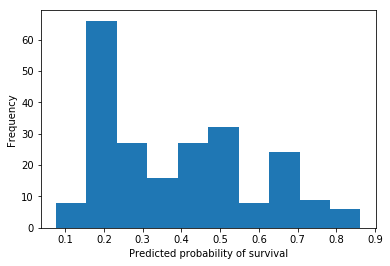

In [40]:
# plot the predicted probabilities
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [41]:
# change the threshold for predicting survived to increase sensitivity
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.25, 1, 0)

In [42]:
# equivalent function in scikit-learn
from sklearn.preprocessing import binarize
#y_pred_class = binarize(y_pred_prob, 0.25)
y_pred_class = binarize(y_pred_prob.reshape(1, -1), 0.25)

In [43]:
# new confusion matrix. Columns=Predicted NO, YES; Row=Actual NO, YES. 
# sensitivity = True Positive / Actual YES
# specificity = True Negative / Actual NO
print (metrics.confusion_matrix(y_test[0:], y_pred_class[0]))

[[57 71]
 [27 68]]


In [44]:
# new sensitivity
print (68 / float(27 + 68))

0.7157894736842105


In [45]:
# new specificity
print (57 / float(57 + 71))

0.4453125


In [46]:
metrics.roc_auc_score(y_test[0:], y_pred_class[0], average='macro', sample_weight=None)

0.5805509868421053

In [47]:
pd.crosstab(y_test[0:], y_pred_class[0], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,57,71,128
1,27,68,95
All,84,139,223


## PRECISION RECALL TRADEOFF
### Little bit of Python Code

In [48]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test[0:], y_pred_class[0]).ravel()

In [49]:
# Precision = Positive Predictive Value = TP / (TP + FP)
float(tp) / float(tp + fp)

0.4892086330935252

In [50]:
metrics.precision_score(y_test[0:], y_pred_class[0])

0.4892086330935252

In [51]:
# Recall = TP / P = TP / (TP + FN)
float(tp) / float(tp + fn)

0.7157894736842105

In [52]:
metrics.recall_score(y_test[0:], y_pred_class[0])

0.7157894736842105

In [53]:
# BUILT OFF OF - https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9894736842105263
Recall metric in the testing dataset:  0.23157894736842105
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0


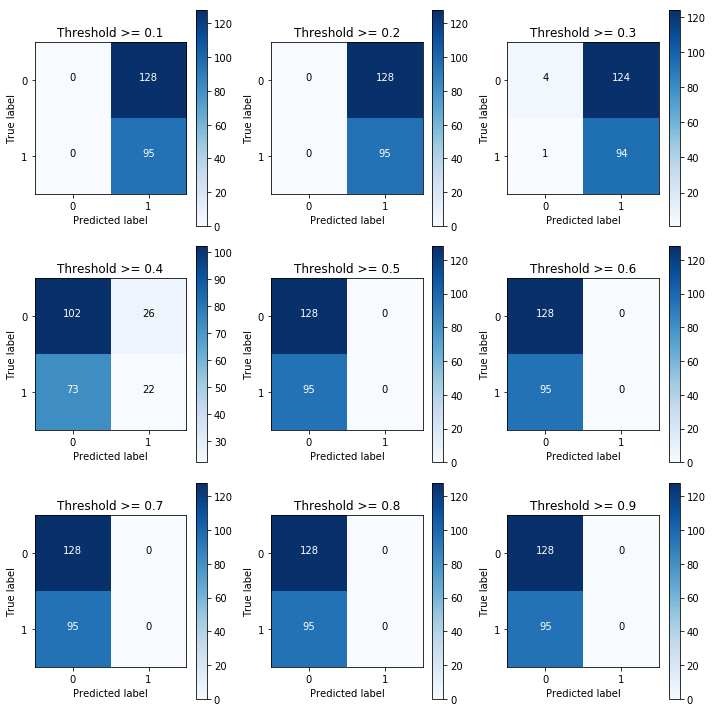

In [54]:
logreg2 = LogisticRegression(C= 0.01, penalty='l1')
logreg2.fit(X_train, y_train)
y_pred_proba2 = logreg2.predict_proba(X_test)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10,10))

j = 1

for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba2[:, 1] > i
    
    plt.subplot(3, 3, j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", float(cnf_matrix[1,1]) / float((cnf_matrix[1,0] + cnf_matrix[1,1])))

    # Plot non-normalized confusion matrix
    class_names = [0, 1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s'%i) 

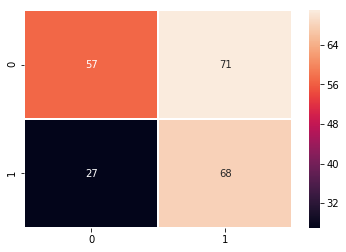

In [55]:
import seaborn as sns
conf = metrics.confusion_matrix(y_test[0:], y_pred_class[0])
sns.heatmap(conf, annot=True, fmt="d", linewidths=.5)

## PART 4: HANDLING CATEGORICAL FEATURES

### scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?
- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding

**Pclass** is an ordered categorical feature, and is already encoded as 1/2/3, so we leave it as-is.

**Sex** is an unordered categorical feature, and needs to be dummy encoded.

### DUMMY ENCODING WITH TWO LEVELS

In [56]:
# encode Sex_Female feature
titanic['Sex_Female'] = titanic.Sex.map({'male':0, 'female':1})

In [57]:
# include Sex_Female in the model
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg=LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [58]:
#### Logistic regression coefficients
dict(zip(feature_cols, logreg.coef_[0]))

{'Pclass': -1.2209320924677813,
 'Parch': -0.11739489102815388,
 'Age': -0.040484287099400725,
 'Sex_Female': 2.6815252123098956}

# $$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4$$

In [59]:
# convert log-odds to odds
dict(zip(feature_cols, np.exp(logreg.coef_[0])))

{'Pclass': 0.2949551133167741,
 'Parch': 0.8892339733032025,
 'Age': 0.960324253872408,
 'Sex_Female': 14.607355632796109}

In [60]:
### example of reshaping a list of items
resh = np.array([1, 0, 29, 0])
resh.reshape(1, -1)

array([[ 1,  0, 29,  0]])

In [ ]:
test_data = [[ 1,  0, 29,  0]]
logreg.predict_proba(test_data)[:, 1]

In [61]:
# Predict probability of survival for **Adam**: first class, no parents or kids, 29 years old, male.
test_data = np.array([1, 0, 29, 0])
test_data = test_data.reshape(1, -1)
logreg.predict_proba(test_data)[:, 1]

array([0.5])

### PART 5: COEFFICIENT INTERPRETATION

#### INTERPRETING THE Pclass COEFFICIENT

In [64]:
# Predict probability of survival for **Bill**: same as Adam, except second class.
test_data = [[2, 0, 29, 0]]
logreg.predict_proba(test_data)[:, 1]

array([0.23])

#### How could we have calculated that change ourselves using the coefficients?

# $$odds = \frac {probability} {1 - probability}$$
# $$probability = \frac {odds} {1 + odds}$$

In [65]:
# convert Adam's probability to odds
adamodds = 0.5/(1 - 0.5)

In [66]:
adamodds

1.0

In [67]:
# adjust odds for Bill due to lower class
billodds = adamodds * 0.295

In [68]:
billodds

0.295

#### INTERPRETING THE SEX_FEMALE COEFFICIENT

In [69]:
# Predict probability of survival for **Susan**: same as Adam, except female.
test_data = [[1, 0, 29, 1]]
logreg.predict_proba(test_data)[:, 1]

array([0.94])

#### Let's calculate that change ourselves:

In [70]:
# adjust odds for Susan due to her sex
susanodds = adamodds * 14.6
susanodds

14.6

#### How do we interpret the **Sex_Female coefficient**? 
For a given Pclass/Parch/Age, being female is associated with an increase in the **log-odds of survival** by 2.68 (or an increase in the **odds of survival** by 14.6) as compared to a male, which is called the **baseline level**.

#### WHAT IF WE HAD REVERSED THE ENCODING FOR SEX?

In [71]:
# encode Sex_Male feature
titanic['Sex_Male'] = titanic.Sex.map({'male':1, 'female':0})

In [72]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Female,Sex_Male
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [73]:
# include Sex_Male in the model instead of Sex_Female
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Male']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
dict(zip(feature_cols, logreg.coef_[0]))

{'Pclass': -1.2201766987717528,
 'Parch': -0.11678129867410102,
 'Age': -0.04043299167952507,
 'Sex_Male': -2.6803869260350712}

* The coefficient is the same, except that it's **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

### PART 6: DUMMY ENCODING WITH MORE THAN TWO LEVELS

#### How do we include an unordered categorical feature with more than two levels, like **Embarked**? 

We can't simply encode it as C=1, Q=2, S=3, because that would imply an **ordered relationship** in which Q is somehow "double" C and S is somehow "triple" C.

Instead, we create **additional dummy variables**:

In [74]:
pd.get_dummies(titanic.Embarked, prefix='Embarked')

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0
7,0,0,1
8,0,0,1
9,0,0,1


In [75]:
# create a DataFrame with the two dummy variable columns
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:, 1:]

In [76]:
embarked_dummies

,Embarked_Q,Embarked_S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1
6,1,0
7,0,1
8,0,1
9,0,1


In [77]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Female,Sex_Male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,1


In [78]:
# include Embarked_Q and Embarked_S in the model
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg=LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
dict(zip(feature_cols, logreg.coef_[0]))

{'Pclass': -1.188498705575055,
 'Parch': -0.0936223511453913,
 'Age': -0.04072731443934316,
 'Sex_Female': 2.642506362959791,
 'Embarked_Q': -0.18494059549508549,
 'Embarked_S': -0.6101991548004119}

#### How do we interpret the Embarked coefficients? 

They are **measured against the baseline (C)**, and thus embarking at Q is associated with a decrease in the likelihood of survival compared with C, and embarking at S is associated with a further decrease in the likelihood of survival.

## PART 7: ROC CURVES AND AUC
-- Follow the lecture slides

In [79]:
# predict probability of survival
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0,0.5,'True Positive Rate (Sensitivity)')

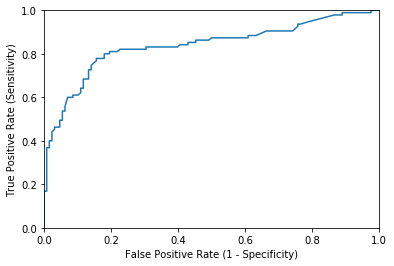

In [80]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

- Besides allowing you to calculate AUC, seeing the ROC curve can help you to choose a threshold that **balances sensitivity and specificity** in a way that makes sense for the particular context.


In [81]:
# calculate AUC
print (metrics.roc_auc_score(y_test, y_pred_prob))

0.8379111842105262


* It's important to use **y_pred_prob** and not **y_pred_class** when computing an ROC curve or AUC. If you use y_pred_class, it will not give you an error, rather it will interpret the ones and zeros as predicted probabilities of 100% and 0%, and thus will give you incorrect results:


In [82]:
# calculate AUC using y_pred_class (producing incorrect results)
print (metrics.roc_auc_score(y_test[0:], y_pred_class[0]))

0.5805509868421053
